In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from glob import glob
from PIL import Image
from scipy import ndimage
import torch.nn as nn

#from lr_utils import load_dataset

%matplotlib inline

In [2]:
# function to get the numpy array of the image
def dataset(dir_0, dir_1):
    train_x_00 = np.empty((0,64,64,3))
    train_x_01 = np.empty((0,64,64,3))
    
    train_x_0 = np.empty((0,64,64,3))
    train_x_1 = np.empty((0,64,64,3))
    
    test_x_0 = np.empty((0,64,64,3))
    test_x_1 = np.empty((0,64,64,3))
    
    train_y_0 = np.empty((0,1))
    train_y_1 = np.empty((0,1))
    
    test_y_0 = np.empty((0,1))
    test_y_1 = np.empty((0,1))
    
    count = 1
    #for x,y in zip(os.listdir(dir_0), os.listdir(dir_1)):
     #   x = dir_0 + x
      #  y = dir_1 + y
    for i,j in zip(os.listdir(dir_0), os.listdir(dir_1)):
        i = dir_0 + i
        j = dir_1 + j
    
    #s = np.zeros((1,1,1,1))
        #for i,j in zip(glob(x + "/*.png"), glob(y+ "/*.png")):
        i = Image.open(i)
        j = Image.open(j)

        i = np.asarray(i)
        i = i[np.newaxis, :, :, :]
        j = np.asarray(j)
        j = j[np.newaxis, :, :, :]

        train_x_00 = np.concatenate((train_x_00, i), axis = 0)
        train_x_01 = np.concatenate((train_x_01, j))

    l = np.floor(train_x_01.shape[0]/1.5).astype(int)
    train_x_0 = np.concatenate((train_x_0, train_x_00[:l,:,:,:]), axis = 0)
    train_x_1 = np.concatenate((train_x_1, train_x_01[:l,:,:,:]))

    train_y_0 = np.concatenate((train_y_0, np.full((train_x_00[:l,:,:,:].shape[0], 1), 0, dtype=int))).astype('uint8')
    train_y_1 = np.concatenate((train_y_1, np.full((train_x_01[:l,:,:,:].shape[0], 1), count, dtype=int))).astype('uint8')

    test_x_0 = np.concatenate((test_x_0, train_x_00[l:,:,:,:]), axis = 0)
    test_x_1 = np.concatenate((test_x_1, train_x_01[l:,:,:,:]))

    test_y_0 = np.concatenate((test_y_0, np.full((train_x_00[l:,:,:,:].shape[0], 1), 0, dtype=int))).astype('uint8')
    test_y_1 = np.concatenate((test_y_1, np.full((train_x_01[l:,:,:,:].shape[0], 1), count, dtype=int))).astype('uint8')

    train_x_00 = np.empty((0,64,64,3))
    train_x_01 = np.empty((0,64,64,3))

    count += 1
#plt.imshow(train)
    
    
    train_y = np.concatenate((train_y_0, train_y_1)).astype('uint8')
    train_x = np.concatenate((train_x_0, train_x_1)).astype('uint8')
    test_y = np.concatenate((test_y_0, test_y_1)).astype('uint8')
    test_x = np.concatenate((test_x_0, test_x_1)).astype('uint8')
    #train = np.concatenate((train_x, train_y), axis= 1)
    #print(train.shape)
    return train_x, train_y, test_x, test_y

In [3]:
import os
file_0 = 'C:/Users/kalee/Desktop/car_camera_front_view/OwnCollection/non-vehicles/Far/'
file_1 = 'C:/Users/kalee/Desktop/car_camera_front_view/OwnCollection/vehicles/far/'
train_x, train_y, test_x, test_y = dataset(file_0, file_1)



In [4]:
train_y = train_y.reshape(1,-1)
test_y = test_y.reshape(1,-1)

In [5]:
print ("Number of training examples: m_train = " + str(train_x.shape[0]))
print ("Number of testing examples: m_test = " + str(test_y.shape[1]))
print ("Height/Width of each image: num_px = " + str(train_x.shape[1]) + str(train_x.shape[2]))
print ("train_set_x shape: " + str(train_x.shape))
print ("train_set_y shape: " + str(train_y.shape))
print ("test_set_x shape: " + str(test_x.shape))
print ("test_set_y shape: " + str(test_y.shape))

Number of training examples: m_train = 1300
Number of testing examples: m_test = 650
Height/Width of each image: num_px = 6464
train_set_x shape: (1300, 64, 64, 3)
train_set_y shape: (1, 1300)
test_set_x shape: (650, 64, 64, 3)
test_set_y shape: (1, 650)


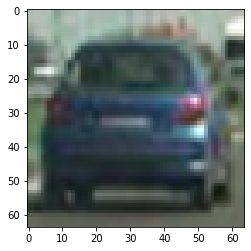

In [6]:
plt.imshow(train_x[1000])

## Flattining up feautres into single column

In [7]:
train_x_flat = train_x.reshape(train_x.shape[1] * train_x.shape[2] * train_x.shape[3], -1)
test_x_flat = test_x.reshape(test_x.shape[1] * test_x.shape[2] * test_x.shape[3], -1)
# Reshape the training and test examples


print ("train_set_x_flatten shape: " + str(train_x_flat.shape))
print ("train_set_y shape: " + str(train_y.shape))
print ("test_set_x_flatten shape: " + str(test_x_flat.shape))
print ("test_set_y shape: " + str(test_y.shape))
print ("sanity check after reshaping: " + str(train_x_flat[0:5,0]))

train_set_x_flatten shape: (12288, 1300)
train_set_y shape: (1, 1300)
test_set_x_flatten shape: (12288, 650)
test_set_y shape: (1, 650)
sanity check after reshaping: [120 125 113 108 110]


In [8]:
train = np.concatenate((train_x_flat, train_y))
train = train[:,np.random.permutation(train.shape[1])]

In [9]:
train_y = train[12288].reshape(1,-1)
train_x_flat = train[0:12288]

## Normalize the features

In [10]:
train_x = train_x_flat/255
test_x  = test_x_flat/255

In [11]:
train_x.shape

(12288, 1300)

In [12]:
print ("sanity check after reshaping: " + str(train_x[0:5,0]))

sanity check after reshaping: [0.47058824 0.47058824 0.43921569 0.4        0.43137255]


## Helper function:
1. Initialize the weight and bias
2. Sigmoid output{0-1}
3. forward propogation (WX+b)
4. backward propogation (partial derivative)
5. update parameter
6. calculate cost function

In [13]:
def initialization(dim):
    '''Used to initialize the weight and bias'''
    np.random.seed(3)
    w = np.random.randn(dim,1) * 0.01
    b = 0
    return w, b

In [14]:
w, b = initialization(train_x.shape[0])
w.shape

(12288, 1)

In [16]:
def sigmoid(z):
    '''Used to get the sigmoid for the output layer'''
    a = 1/(1 + np.exp(-z))
    #assert(a.shape == z.shape)
    return a

sigmoid(np.array([0,1,2]))

array([0.5       , 0.73105858, 0.88079708])

In [17]:
def one_hot(y):
    # Define zero array with shape = num_of_classes - 1, num_examples
    y_hat = np.zeros((len(set(y[0,:])), y.shape[1]))
    # iterate over examples where the class found replace with one in the defined array above
    for i in range(len(y_hat[0,:])):
        # If the class != zero then replace the row represent the class with one
        if y[0,i] != 0:
            y_hat[y[0,i] - 1, i]  = 1
        # Return the defined array
    return y_hat

In [18]:
e = one_hot(train_y)
e[:,25]

array([0., 0.])

In [20]:
x = np.array([[1,1,1,1,1],[1,1,1,1,1]])
y= np.array([[1,0,1,1,0], [1,0,0,0,0]])
l = []
for i in  range(x.shape[1]):
    l.append(((x[:,i]==y[:,i]).astype(int))/10)
l

[array([0.1, 0.1]),
 array([0., 0.]),
 array([0.1, 0. ]),
 array([0.1, 0. ]),
 array([0., 0.])]

In [21]:
def pred(x, y, x_test, y_test, learning_rate, num_iteration, print_cost = False):
    np.random.seed(1)
    costs=[]
    costs_dev = []
    m = x.shape[1]
    dim = x.shape[0]
    w, b = initialization(dim)
    #y = one_hot(y)
    for i in range(num_iteration):

        z = np.matmul(w.T, x) + b
        z_dev = np.matmul(w.T, x_test) + b
        #print(z.shape)
        #a = softmax(z)
        a = sigmoid(z)
        a_dev = sigmoid(z_dev)
        cost = -1/m * np.sum((y * np.log(a)) - ((1-y) * np.log(1-a)) )
        cost_dev = -1/m * np.sum((y_test * np.log(a_dev)) - ((1-y_test) * np.log(1-a_dev)) )
        #cost = -1/m * np.sum( y * np.log(a) )
        dw = 1/m *(np.matmul(x, (a-y).T))
        #print(dw.shape)
        db = 1/m *(np.sum(a-y))
        #print("dw shape = ", dw.shape)

        w = w - (learning_rate * dw)
        b = b - learning_rate * db
        
        if print_cost and i % 100 == 0:
            costs.append(cost)
            costs_dev.append(cost_dev)
            print ("Cost after iteration %i: %f" %(i, cost))
            
    #z_0 = np.matmul(w.T, x) + b
    #a_0 = softmax(z_0)
    #a_0 = sigmoid(z_0)
    #z_1 = np.matmul(w.T, x_test) + b
    #a_1 = softmax(z_1)
    #a_1 = sigmoid(z_1)
    #print(a_1.shape)
    #print(a_1[:,1])
    #for i in a_1.shape[0]:
    #print(w.shape)
    y_predict_train = predict(w, b, x)
    y_predict_test = predict(w, b, x_test)
    #y_predict_train = one_hot(y_predict_train)
    #y_predict_test = one_hot(y_predict_test)
        
    
    print('train accuracy = ', (100 - np.mean(np.abs(y_predict_train - y)) * 100))
    print('test accuracy = ', (100 - np.mean(np.abs(y_predict_test - y_test)) * 100))
   
    plt.plot(np.squeeze(costs), label='Train')
    plt.plot(np.squeeze(costs_dev), label='Valid')
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.legend()
    plt.show()
    
    return a 


In [22]:
# GRADED FUNCTION: predict

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    ### START CODE HERE ### (≈ 1 line of code)
    A = sigmoid(np.matmul(w.T, X) + b)
    ### END CODE HERE ###
    
    for i in range(X.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        ### START CODE HERE ### (≈ 4 lines of code)
        Y_prediction[:,i] = np.where(A[:,i] <= 0.5, 0 , 1)
        ### END CODE HERE ###
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

Cost after iteration 0: 0.375112
Cost after iteration 100: -0.000035
Cost after iteration 200: 0.000020
Cost after iteration 300: 0.000037
Cost after iteration 400: 0.000044
Cost after iteration 500: 0.000047
Cost after iteration 600: 0.000049
Cost after iteration 700: 0.000049
Cost after iteration 800: 0.000049
train accuracy =  100.0
test accuracy =  66.3076923076923


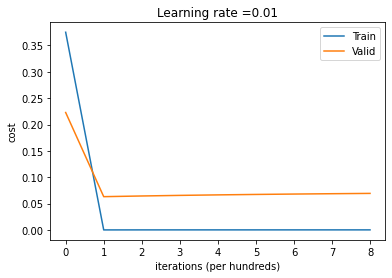

In [23]:
d = pred(train_x, train_y, test_x, test_y, 0.01, 900, True )